# Testing Knownledge

In [1]:
import pandas as pd
df=pd.read_csv("data/auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:
origins = {1: 'American', 2: 'European', 3: 'Japanese'}
df['origin'] = df.origin.apply(lambda o : origins[o] )

In [4]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,American,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,American,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,American,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,American,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,American,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,American,ford mustang gl
388,44.0,4,97.0,52.0,2130.0,24.6,82,European,vw pickup
389,32.0,4,135.0,84.0,2295.0,11.6,82,American,dodge rampage
390,28.0,4,120.0,79.0,2625.0,18.6,82,American,ford ranger


In [5]:
df = df.merge(pd.get_dummies(df.origin), left_index=True, right_index= True )

In [6]:
print(df['American'].value_counts())

1    245
0    147
Name: American, dtype: int64


In [7]:
print(df['European'].value_counts())

0    324
1     68
Name: European, dtype: int64


In [8]:
print(df['Japanese'].value_counts())

0    313
1     79
Name: Japanese, dtype: int64


In [10]:
import statsmodels.formula.api as smf
M_US0 = 'American ~ mpg + cylinders + displacement + horsepower + weight + acceleration'
res_US0 = smf.logit(M_US0, data = df).fit()
res_US0.summary()

Optimization terminated successfully.
         Current function value: 0.253958
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               American   No. Observations:                  392
Model:                          Logit   Df Residuals:                      385
Method:                           MLE   Df Model:                            6
Date:                Sun, 14 Jun 2020   Pseudo R-squ.:                  0.6161
Time:                        12:35:17   Log-Likelihood:                -99.551
converged:                       True   LL-Null:                       -259.33
Covariance Type:            nonrobust   LLR p-value:                 5.240e-66
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.0433      3.329      0.914      0.361      -3.482       9.568
mpg             -0.0224      0.040     -0.553      0.580      -0.102       0.057
cylinders       -1.5509      0.455     -3.411      0.001      -2.442      -0.660
displacement     0.1277      0.018      7.067      0.000       0.092       0.163
horsepower      -0.0323      0.023     -1.416      0.157      -0.077       0.012
weight          -0.0042      0.001     -3.620      0.000      -0.006      -0.002
acceleration     0.0669      0.110      0.608      0.543      -0.149       0.283
================================================================================

Possibly complete quasi-separation: A fraction 0.25 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [11]:
M_US1 = 'American ~ cylinders + displacement + weight'
res_US1 = smf.logit(M_US1, data = df).fit()
res_US1.summary()

Optimization terminated successfully.
         Current function value: 0.263467
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               American   No. Observations:                  392
Model:                          Logit   Df Residuals:                      388
Method:                           MLE   Df Model:                            3
Date:                Sun, 14 Jun 2020   Pseudo R-squ.:                  0.6018
Time:                        12:35:31   Log-Likelihood:                -103.28
converged:                       True   LL-Null:                       -259.33
Covariance Type:            nonrobust   LLR p-value:                 2.384e-67
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.8002      1.663      1.684      0.092      -0.460       6.060
cylinders       -1.7264      0.433     -3.991      0.000      -2.574      -0.878
displacement     0.1182      0.016      7.325      0.000       0.087       0.150
weight          -0.0042      0.001     -4.633      0.000      -0.006      -0.002
================================================================================

Possibly complete quasi-separation: A fraction 0.20 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

(array([ 21.,  32.,  27.,  28.,   9.,  19.,  10.,   4.,   7.,   6.,   4.,
          9.,   2.,   4.,   7.,   6.,   7.,   6.,  14., 170.]),
 array([0.01278378, 0.06214459, 0.1115054 , 0.16086621, 0.21022702,
        0.25958783, 0.30894865, 0.35830946, 0.40767027, 0.45703108,
        0.50639189, 0.5557527 , 0.60511351, 0.65447432, 0.70383513,
        0.75319594, 0.80255676, 0.85191757, 0.90127838, 0.95063919,
        1.        ]),
 <a list of 20 Patch objects>)

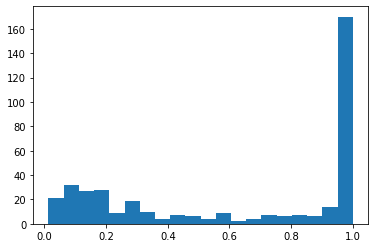

In [13]:
yhat = res_US1.predict(df)
import matplotlib.pyplot as plt
plt.hist(yhat, bins = 20)

In [14]:
res_US1.pred_table()


array([[132.,  15.],
       [ 30., 215.]])

In [16]:
df.American.value_counts()

1    245
0    147
Name: American, dtype: int64

In [18]:
df=pd.read_csv("data/titanic.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [19]:
formula = 'survived ~ age + pclass + fare + sibsp + parch'
results1 = smf.logit(formula=formula, data = df).fit()
results1.summary()

Optimization terminated successfully.
         Current function value: 0.590430
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                 1045
Model:                          Logit   Df Residuals:                     1039
Method:                           MLE   Df Model:                            5
Date:                Sun, 14 Jun 2020   Pseudo R-squ.:                  0.1270
Time:                        13:08:20   Log-Likelihood:                -617.00
converged:                       True   LL-Null:                       -706.79
Covariance Type:            nonrobust   LLR p-value:                 6.602e-37
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8370      0.392      7.242      0.000       2.069       3.605
age           -0.0386      0.006     -6.685      0.000      -0.050      -0.027
pclass        -1.0023      0.115     -8.717      0.000      -1.228      -0.777
fare           0.0033      0.002      1.818      0.069      -0.000       0.007
sibsp         -0.2671      0.087     -3.061      0.002      -0.438      -0.096
parch          0.3047      0.089      3.439      0.001       0.131       0.478
==============================================================================
"""

In [25]:
df.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055512,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055512,1.000000,-0.243699,-0.150917,0.178740,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178740,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


In [26]:
df['fare2'] = df.fare**2
df['fare3'] = df.fare**3
df['fare4'] = df.fare**4

In [27]:
M1 = 'survived ~ fare'
M2 = 'survived ~ fare + fare2'
M3 = 'survived ~ fare + fare2 + fare3'
M4 = 'survived ~ fare + fare2 + fare3 + fare4'

In [40]:
model1=smf.ols(formula=M1,data=df).fit()
print("\n M1 rsquared : {}".format(model1.rsquared))
print(" M1 p values : {} \n".format(model1.pvalues))
model2=smf.ols(formula=M2,data=df).fit()
print("\n M2 rsquared : {}".format(model2.rsquared))
print(" M2 p values : {} \n".format(model2.pvalues))
model3=smf.ols(formula=M3,data=df).fit()
print("\n M3 rsquared : {}".format(model3.rsquared))
print(" M3 p values : {} \n".format(model3.pvalues))
model4=smf.ols(formula=M4,data=df).fit()
print("\n M4 rsquared : {}".format(model4.rsquared))
print(" M4 p values : {} \n".format(model4.pvalues))


 M1 rsquared : 0.05966561930417291
 M1 p values : Intercept    5.045788e-76
fare         3.193677e-19
dtype: float64 


 M2 rsquared : 0.0753942585053583
 M2 p values : Intercept    2.537244e-45
fare         2.658832e-17
fare2        2.720163e-06
dtype: float64 


 M3 rsquared : 0.0927189734840349
 M3 p values : Intercept    4.220951e-19
fare         1.534107e-17
fare2        5.111676e-09
fare3        6.853282e-07
dtype: float64 


 M4 rsquared : 0.09486506210828438
 M4 p values : Intercept    8.086716e-09
fare         1.077270e-08
fare2        2.180321e-03
fare3        3.133606e-02
fare4        7.903707e-02
dtype: float64 



In [56]:
model1=smf.logit(formula=M1,data=df).fit()
tab_1=model1.pred_table()
tab_1

Optimization terminated successfully.
         Current function value: 0.632275
         Iterations 6


array([[759.,  49.],
       [393., 107.]])

In [52]:
df.survived.value_counts()

0    809
1    500
Name: survived, dtype: int64

In [57]:
model2=smf.logit(formula=M2,data=df).fit()
tab_2=model2.pred_table()
tab_2

Optimization terminated successfully.
         Current function value: 0.627349
         Iterations 5


array([[740.,  68.],
       [374., 126.]])

In [58]:
model3=smf.logit(formula=M3,data=df).fit()
tab_3=model3.pred_table()
tab_3

Optimization terminated successfully.
         Current function value: 0.617332
         Iterations 8


array([[697., 111.],
       [327., 173.]])

In [61]:
accuracy3=(tab_3[0][0]+tab_3[1][1])/(809 + 500)
accuracy3

0.6646294881588999

In [63]:
M2 = 'survived ~ age + pclass + fare + sibsp + parch'
model2=smf.logit(formula=M2,data=df).fit()
tab_2=model2.pred_table()
accuracy3=(tab_2[0][0]+tab_2[1][1])/(809 + 500)
accuracy3

Optimization terminated successfully.
         Current function value: 0.590430
         Iterations 5


0.5530939648586708

In [64]:
M3 = 'survived ~ age + pclass + fare + sibsp + parch + C(sex)'
model2=smf.logit(formula=M3,data=df).fit()
tab_2=model2.pred_table()
accuracy3=(tab_2[0][0]+tab_2[1][1])/(809 + 500)
accuracy3

Optimization terminated successfully.
         Current function value: 0.464293
         Iterations 6


0.6279602750190986

In [67]:
M2 = 'survived ~ C(pclass)'
model2=smf.logit(formula=M2,data=df).fit()
model2.summary()

Optimization terminated successfully.
         Current function value: 0.616218
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                 1309
Model:                          Logit   Df Residuals:                     1306
Method:                           MLE   Df Model:                            2
Date:                Sun, 14 Jun 2020   Pseudo R-squ.:                 0.07339
Time:                        13:52:12   Log-Likelihood:                -806.63
converged:                       True   LL-Null:                       -870.51
Covariance Type:            nonrobust   LLR p-value:                 1.803e-28
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4861      0.115      4.242      0.000       0.262       0.711
C(pclass)[T.2]    -0.7696      0.167     -4.611      0.000      -1.097      -0.442
C(pclass)[T.3]    -1.5567      0.143    -10.860      0.000      -1.838      -1.276
==================================================================================
"""